In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Thavanesh/Downloads/TT-TFR-4.csv/TT-TFR-4-MAR.csv")

In [3]:
df.head()

,Datetime,RealEnergyWH,ApparentEnergyVAH,ReactiveEnergyVARHP,ReactiveEnergyVARHN,LineVoltageVRY,LineVoltageVYB,LineVoltageVBR,LineCurrentIR,LineCurrentIY,...,Frequency,RealPowerR,RealPowerY,RealPowerB,ReactivePowerR,ReactivePowerY,ReactivePowerB,ApparentPowerR,ApparentPowerY,ApparentPowerB
0,01/03/2024 00:00:02,803720.0,856868.0,13718.0,186357.0,417.38,413.95,423.20,232.18,238.15,...,50.1,47499.67,51699.23,50971.24,-30291.60,-23859.44,-31391.97,56309.09,56911.01,59821.66
1,01/03/2024 00:01:01,803723.0,856871.0,13718.0,186359.0,417.72,414.96,422.98,226.06,226.04,...,50.1,45576.98,48050.12,49739.34,-30483.87,-25003.06,-32335.55,54805.89,54143.62,59279.98
2,01/03/2024 00:02:01,803726.0,856874.0,13718.0,186360.0,416.94,416.18,422.29,229.96,235.24,...,50.1,47394.80,51419.88,53015.66,-29050.59,-23265.80,-30422.18,55566.23,56413.41,61079.77
3,01/03/2024 00:03:01,803727.0,856876.0,13718.0,186361.0,416.94,416.37,422.64,238.08,240.07,...,50.1,50855.64,52650.80,51408.08,-26883.20,-23466.59,-30719.24,57497.66,57618.14,59847.87
4,01/03/2024 00:04:01,803730.0,856879.0,13718.0,186363.0,416.85,415.41,423.34,237.23,246.50,...,50.1,50663.37,54099.97,52351.66,-27005.55,-23649.92,-30011.55,57384.04,59014.93,60310.92


In [4]:
df = df[["Datetime","RealPower"]]
df.head()

,Datetime,RealPower
0,01/03/2024 00:00:02,150171.20
1,01/03/2024 00:01:01,143366.31
2,01/03/2024 00:02:01,151830.94
3,01/03/2024 00:03:01,154914.55
4,01/03/2024 00:04:01,157115.88


In [5]:
df["Datetime"] = pd.to_datetime(df["Datetime"],dayfirst=True)

In [6]:
df['Datetime'] = df['Datetime'].apply(lambda dt:dt.replace(second=0))
df.head()

,Datetime,RealPower
0,2024-03-01 00:00:00,150171.20
1,2024-03-01 00:01:00,143366.31
2,2024-03-01 00:02:00,151830.94
3,2024-03-01 00:03:00,154914.55
4,2024-03-01 00:04:00,157115.88


In [7]:
df.set_index(["Datetime"],inplace=True)

In [8]:
df.head()

,RealPower
Datetime,
2024-03-01 00:00:00,150171.20
2024-03-01 00:01:00,143366.31
2024-03-01 00:02:00,151830.94
2024-03-01 00:03:00,154914.55
2024-03-01 00:04:00,157115.88


In [9]:
df.describe()

,RealPower
count,42813.000000
mean,172384.239080
std,76569.310159
min,0.000000
25%,123545.630000
50%,159282.270000
75%,229078.310000
max,437426.970000


<Axes: xlabel='Datetime'>

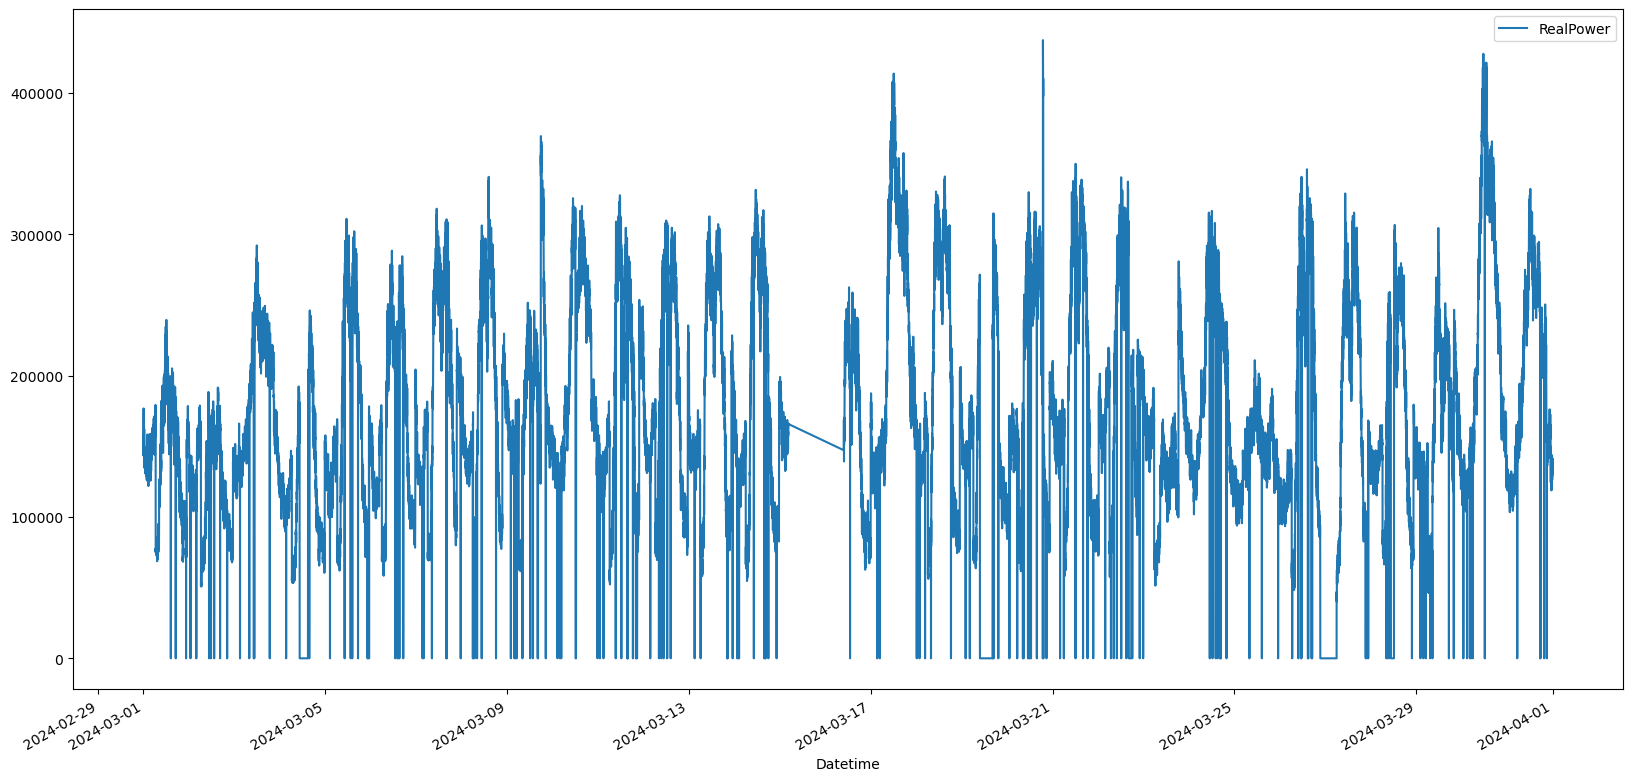

In [10]:
df.plot(figsize=(20, 10))

In [11]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')
df_reindexed = df.reindex(full_index)
df = df_reindexed.fillna(method='ffill')
#df = df_reindexed.interpolate(method='linear')

In [12]:
df.describe()

,RealPower
count,44640.000000
mean,172162.467978
std,75040.760116
min,0.000000
25%,125397.540000
50%,162885.635000
75%,225785.080000
max,437426.970000


<Axes: >

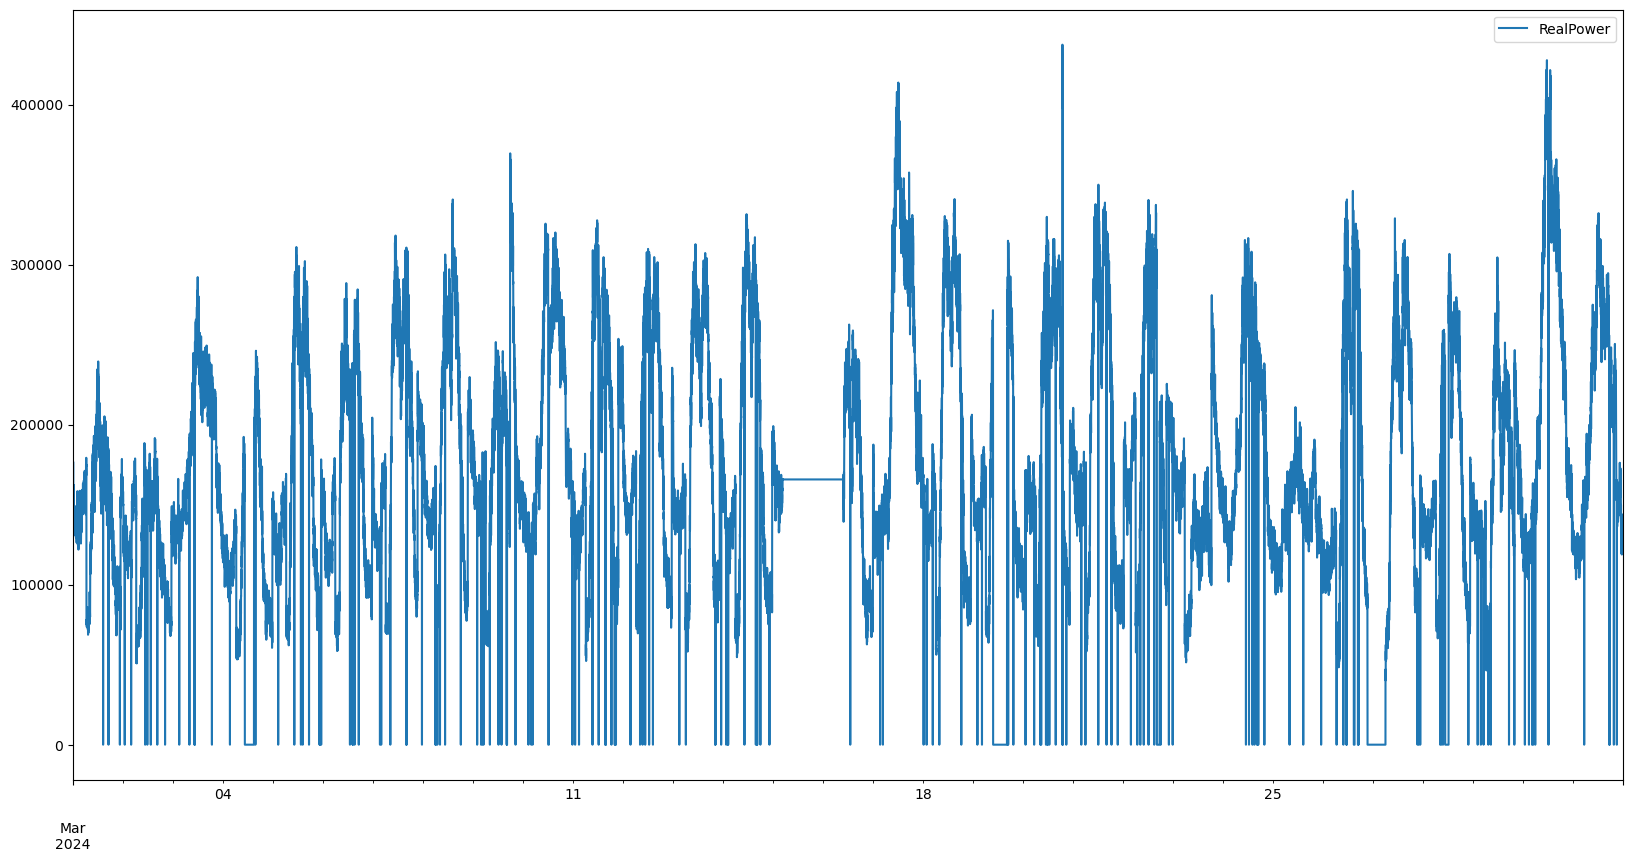

In [13]:
df.plot(figsize=(20, 10))

In [14]:
df = df['RealPower'].resample('H').mean().round(2)
df.head()

2024-03-01 00:00:00    145423.65
2024-03-01 01:00:00    137071.57
2024-03-01 02:00:00    138512.77
2024-03-01 03:00:00    142897.95
2024-03-01 04:00:00    149956.90
Freq: H, Name: RealPower, dtype: float64

In [15]:
df = df.reset_index()
df.head()

,index,RealPower
0,2024-03-01 00:00:00,145423.65
1,2024-03-01 01:00:00,137071.57
2,2024-03-01 02:00:00,138512.77
3,2024-03-01 03:00:00,142897.95
4,2024-03-01 04:00:00,149956.90


In [16]:
df.rename(columns={'index':'Date'},inplace=True)
df.head()

,Date,RealPower
0,2024-03-01 00:00:00,145423.65
1,2024-03-01 01:00:00,137071.57
2,2024-03-01 02:00:00,138512.77
3,2024-03-01 03:00:00,142897.95
4,2024-03-01 04:00:00,149956.90


In [17]:
df.set_index(["Date"],inplace=True)
df.head()

,RealPower
Date,
2024-03-01 00:00:00,145423.65
2024-03-01 01:00:00,137071.57
2024-03-01 02:00:00,138512.77
2024-03-01 03:00:00,142897.95
2024-03-01 04:00:00,149956.90


<Axes: xlabel='Date'>

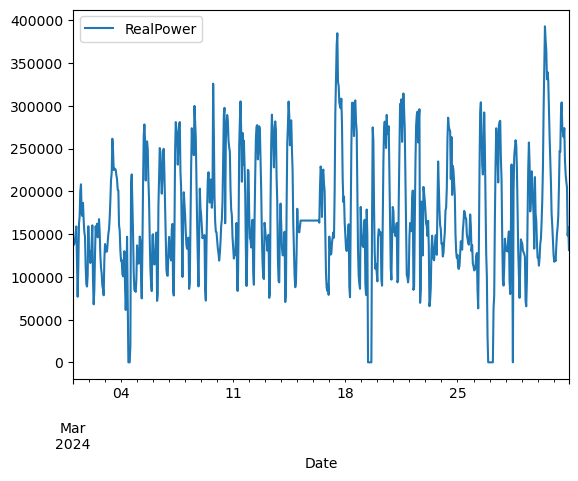

In [18]:
df.plot()

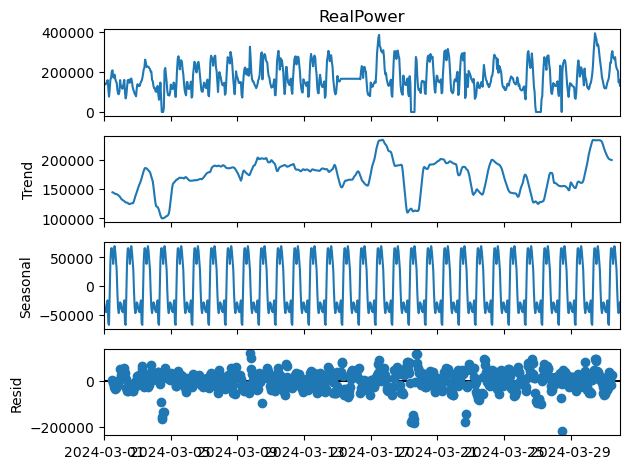

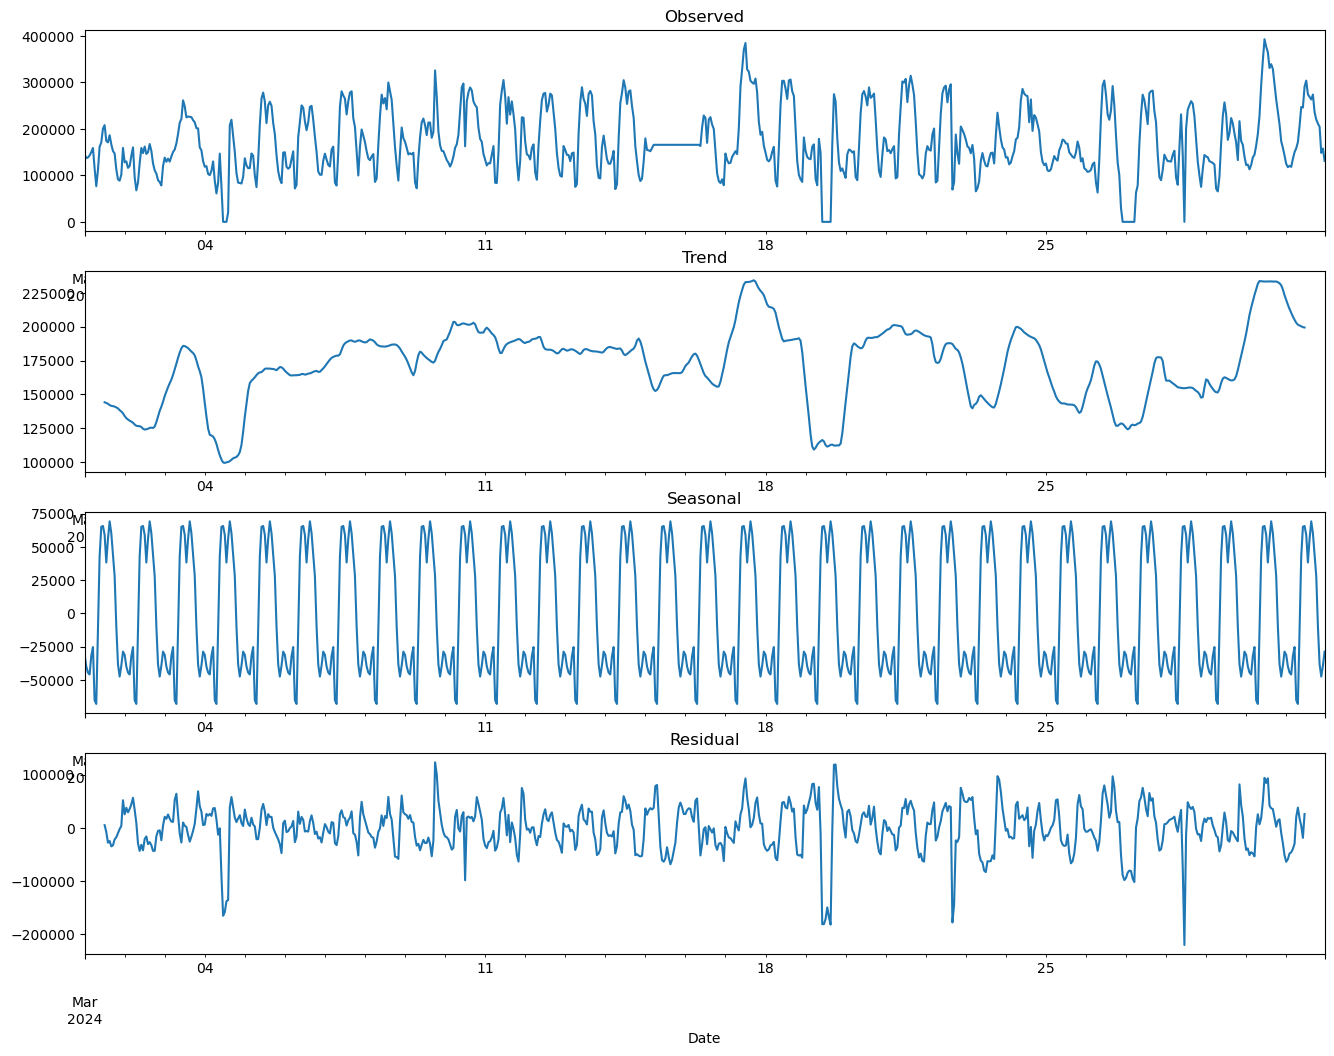

In [19]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df['RealPower'],model='addictive')
fig=decomposition.plot()
fig, axes = plt.subplots(4, 1, figsize=(16, 12))  # Adjust the figsize as needed (width, height)

# Plot each component individually
decomposition.observed.plot(ax=axes[0], title="Observed")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonal")
decomposition.resid.plot(ax=axes[3], title="Residual")
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(power):
    result=adfuller(power)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['RealPower'])

ADF Test Statistic : -4.677906595733232
p-value : 9.257336409541775e-05
#Lags Used : 20
Number of Observations Used : 723
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


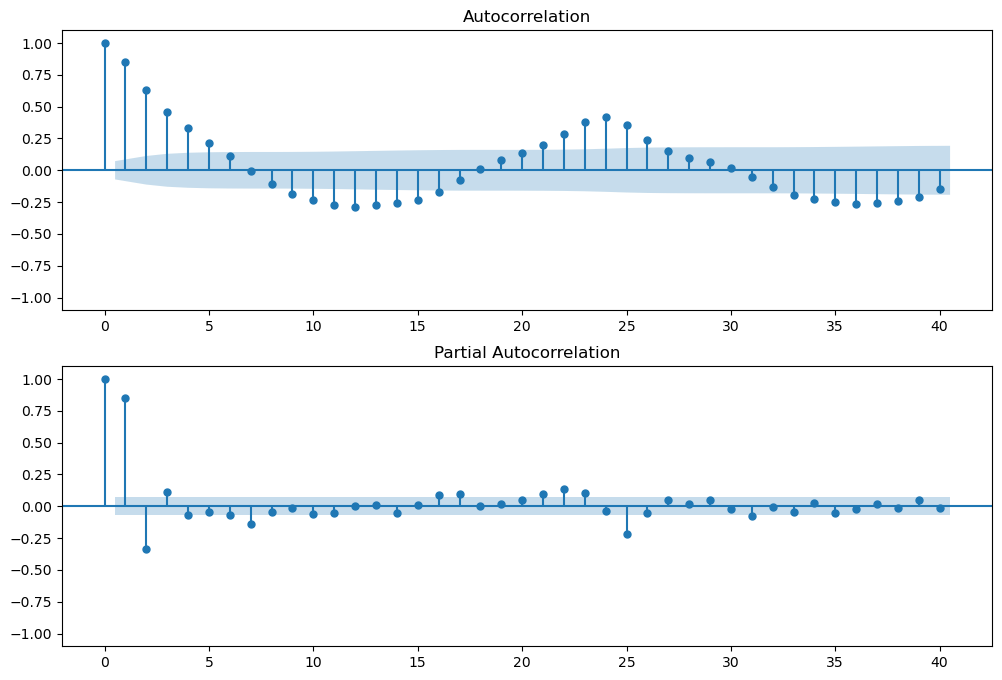

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['RealPower'].dropna(),lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['RealPower'].dropna(),lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
s=round(len(df)*90/100)
train=df[:s]
test=df[s:]
test.index[0]

Timestamp('2024-03-28 22:00:00')

In [25]:
model=ARIMA(train['RealPower'],order=(3,0,5))
model_fit=model.fit()

C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,RealPower,forecast
Date,,
2024-03-31 19:00:00,211284.10,168104.052609
2024-03-31 20:00:00,204684.20,152718.358504
2024-03-31 21:00:00,148319.29,138481.447721
2024-03-31 22:00:00,157823.45,126362.762049
2024-03-31 23:00:00,131281.14,117186.970248


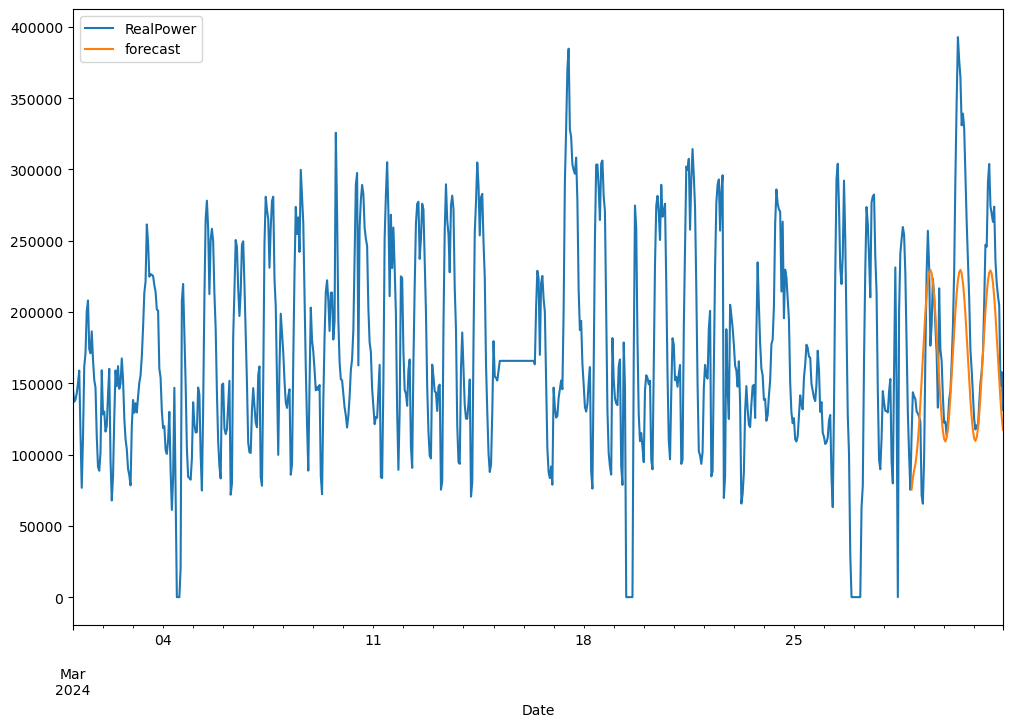

In [26]:
df['forecast']=model_fit.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['RealPower','forecast']].plot(figsize=(12,8))
df.tail()

In [27]:
df['Seasonal First Difference']=df['RealPower']-df['RealPower'].shift(24)
df.head(30)

,RealPower,forecast,Seasonal First Difference
Date,,,
2024-03-01 00:00:00,145423.65,NaN,NaN
2024-03-01 01:00:00,137071.57,NaN,NaN
2024-03-01 02:00:00,138512.77,NaN,NaN
2024-03-01 03:00:00,142897.95,NaN,NaN
2024-03-01 04:00:00,149956.90,NaN,NaN
2024-03-01 05:00:00,158904.46,NaN,NaN
2024-03-01 06:00:00,115225.87,NaN,NaN
2024-03-01 07:00:00,76689.82,NaN,NaN
2024-03-01 08:00:00,111439.21,NaN,NaN


In [28]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.46958485902116
p-value : 1.490167377207156e-13
#Lags Used : 3
Number of Observations Used : 716
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


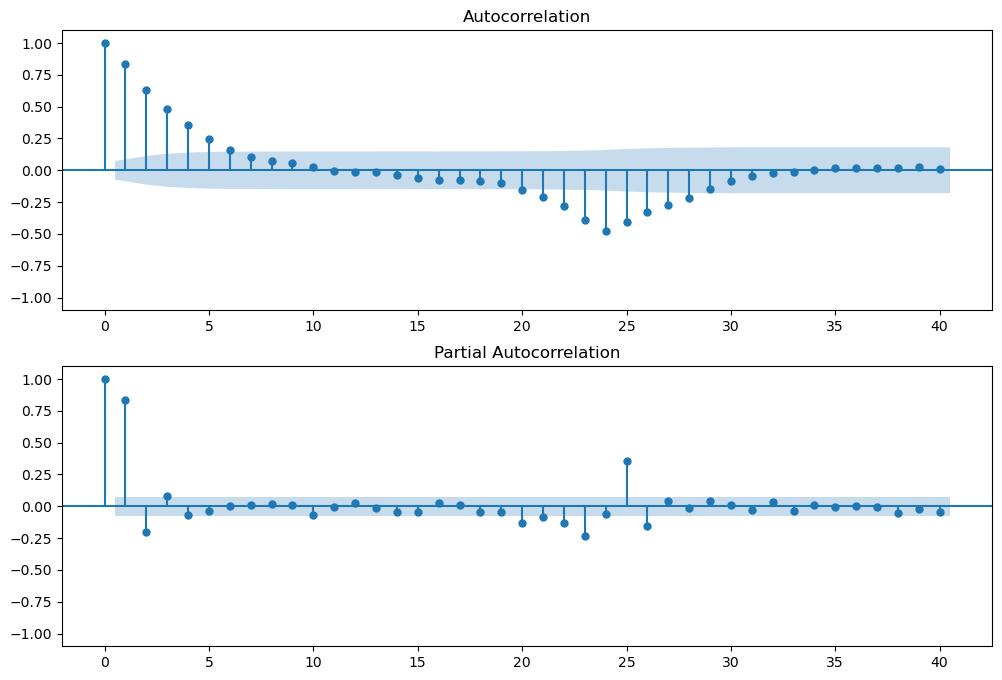

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[25:],lags=40,ax=ax1)
ax1.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[25:],lags=40,ax=ax2)
ax2.set_ylim([-1.1, 1.1])  # Adding a margin to the y-axis limits
print()

In [30]:
model=SARIMAX(train['RealPower'],order=(3, 0, 5),seasonal_order=(2,0,5,24))
results=model.fit()

C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Thavanesh\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

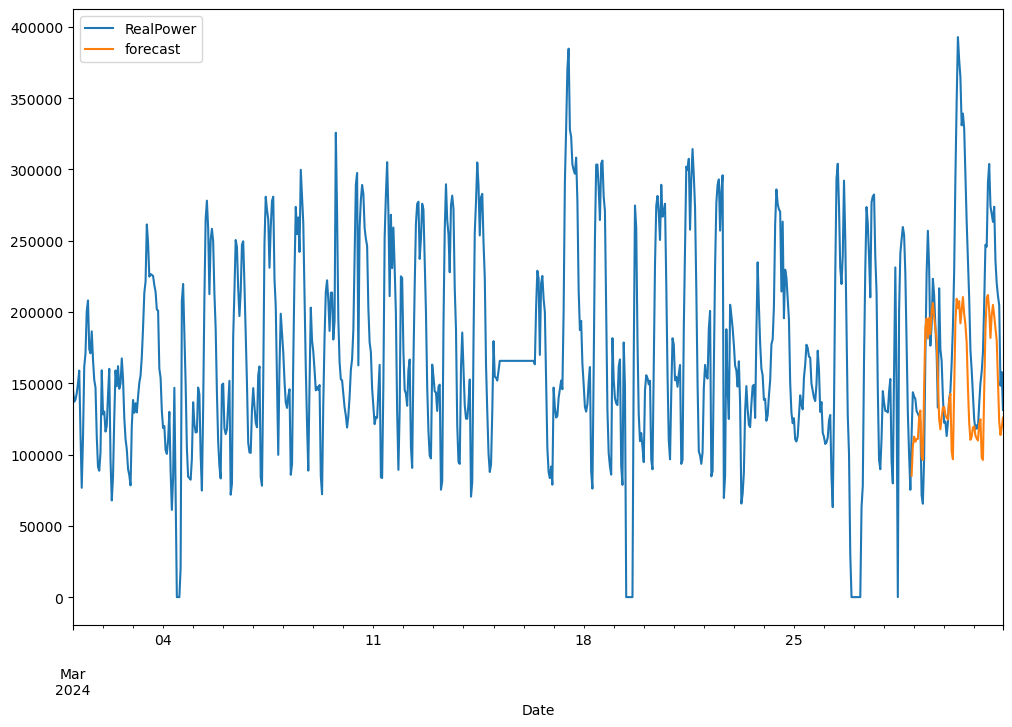

In [31]:
df['forecast']=results.predict(start=test.index[0],end=test.index[-1],dynamic=True)
df[['RealPower','forecast']].plot(figsize=(12,8))

# PER HOUR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("C:/Users/Thavanesh/Downloads/TT-TFR-4.csv/TT-TFR-4-MAR.csv")
df2 = pd.read_csv("C:/Users/Thavanesh/Downloads/TT-TFR-4.csv/TT-TFR-4-APR.csv")
df3 = pd.read_csv("C:/Users/Thavanesh/Downloads/TT-TFR-4.csv/TT-TFR-4-MAY.csv")
df=pd.concat([df1,df2,df3])
df.head()

,Datetime,RealEnergyWH,ApparentEnergyVAH,ReactiveEnergyVARHP,ReactiveEnergyVARHN,LineVoltageVRY,LineVoltageVYB,LineVoltageVBR,LineCurrentIR,LineCurrentIY,...,Frequency,RealPowerR,RealPowerY,RealPowerB,ReactivePowerR,ReactivePowerY,ReactivePowerB,ApparentPowerR,ApparentPowerY,ApparentPowerB
0,01/03/2024 00:00:02,803720.0,856868.0,13718.0,186357.0,417.38,413.95,423.20,232.18,238.15,...,50.1,47499.67,51699.23,50971.24,-30291.60,-23859.44,-31391.97,56309.09,56911.01,59821.66
1,01/03/2024 00:01:01,803723.0,856871.0,13718.0,186359.0,417.72,414.96,422.98,226.06,226.04,...,50.1,45576.98,48050.12,49739.34,-30483.87,-25003.06,-32335.55,54805.89,54143.62,59279.98
2,01/03/2024 00:02:01,803726.0,856874.0,13718.0,186360.0,416.94,416.18,422.29,229.96,235.24,...,50.1,47394.80,51419.88,53015.66,-29050.59,-23265.80,-30422.18,55566.23,56413.41,61079.77
3,01/03/2024 00:03:01,803727.0,856876.0,13718.0,186361.0,416.94,416.37,422.64,238.08,240.07,...,50.1,50855.64,52650.80,51408.08,-26883.20,-23466.59,-30719.24,57497.66,57618.14,59847.87
4,01/03/2024 00:04:01,803730.0,856879.0,13718.0,186363.0,416.85,415.41,423.34,237.23,246.50,...,50.1,50663.37,54099.97,52351.66,-27005.55,-23649.92,-30011.55,57384.04,59014.93,60310.92


In [3]:
df = df[["Datetime","RealPower"]]
df["Datetime"] = pd.to_datetime(df["Datetime"],dayfirst=True)
#df['Datetime'] = df['Datetime'].apply(lambda dt:dt.replace(second=0))
df.set_index(["Datetime"],inplace=True)
df.head()

,RealPower
Datetime,
2024-03-01 00:00:02,150171.20
2024-03-01 00:01:01,143366.31
2024-03-01 00:02:01,151830.94
2024-03-01 00:03:01,154914.55
2024-03-01 00:04:01,157115.88


In [4]:
df.describe()

,RealPower
count,117593.000000
mean,179188.911591
std,87709.439376
min,0.000000
25%,126253.610000
50%,163422.840000
75%,241211.810000
max,582356.440000


In [5]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')
df_reindexed = df.reindex(full_index)
df = df_reindexed.fillna(method='ffill')
#df = df_reindexed.interpolate(method='linear')

In [6]:
df = df['RealPower'].resample('H').mean().round(2)
df = df.reset_index()
df.rename(columns={'index':'Time'},inplace=True)
df.set_index(["Time"],inplace=True)
df.head()

,RealPower
Time,
2024-03-01 00:00:00,149819.75
2024-03-01 01:00:00,135160.69
2024-03-01 02:00:00,136229.47
2024-03-01 03:00:00,135731.84
2024-03-01 04:00:00,137493.49


In [7]:
df["shiftedpower"]=df["RealPower"].shift()
df.head()

,RealPower,shiftedpower
Time,,
2024-03-01 00:00:00,149819.75,NaN
2024-03-01 01:00:00,135160.69,149819.75
2024-03-01 02:00:00,136229.47,135160.69
2024-03-01 03:00:00,135731.84,136229.47
2024-03-01 04:00:00,137493.49,135731.84


In [8]:
print(df["RealPower"].corr(df["shiftedpower"]))

0.8867938439987822


<Axes: xlabel='shiftedpower'>

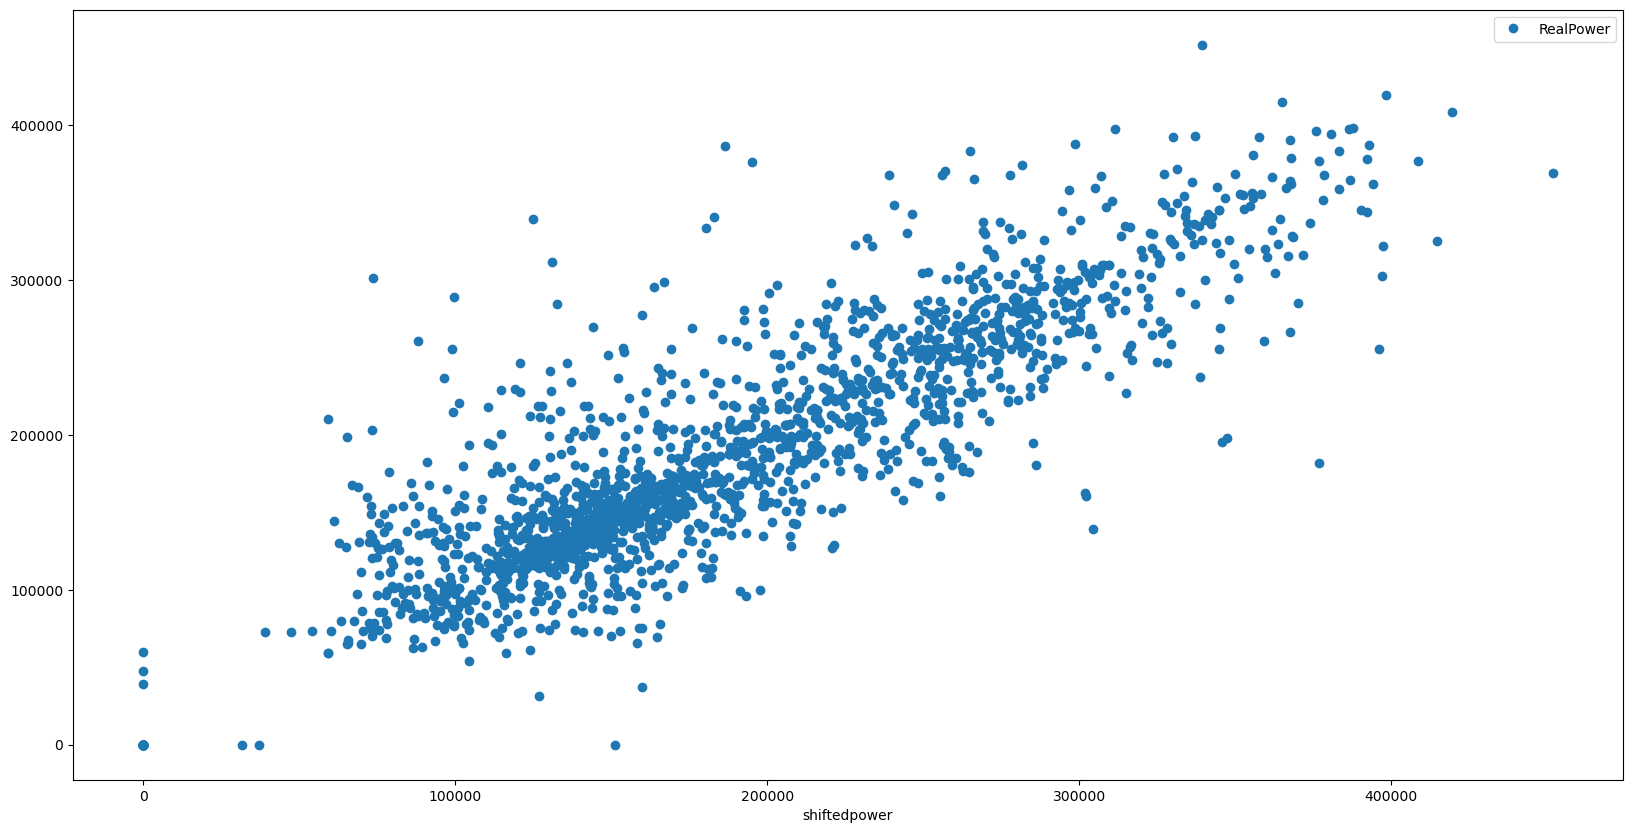

In [9]:
df.plot(x='shiftedpower',y='RealPower',figsize=(20,10),marker='o', linestyle='None')

In [10]:
df.count()

RealPower       2208
shiftedpower    2207
dtype: int64

<Axes: >

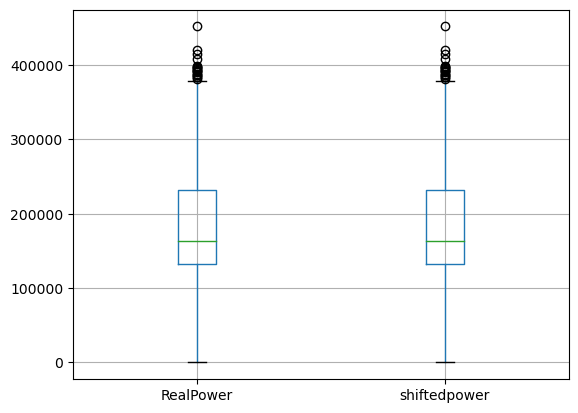

In [11]:
df.boxplot()

<Axes: >

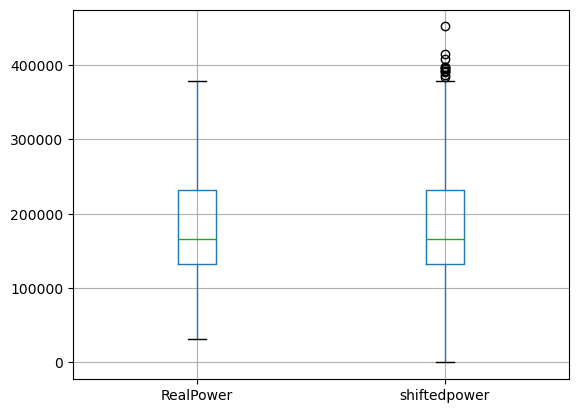

In [12]:
df=df[df['RealPower']<=380000]
df=df[df['RealPower']!=0]
df.boxplot()

In [13]:
df["shiftedpower"]=df["RealPower"].shift()
df.head()

,RealPower,shiftedpower
Time,,
2024-03-01 00:00:00,149819.75,NaN
2024-03-01 01:00:00,135160.69,149819.75
2024-03-01 02:00:00,136229.47,135160.69
2024-03-01 03:00:00,135731.84,136229.47
2024-03-01 04:00:00,137493.49,135731.84


<Axes: xlabel='shiftedpower'>

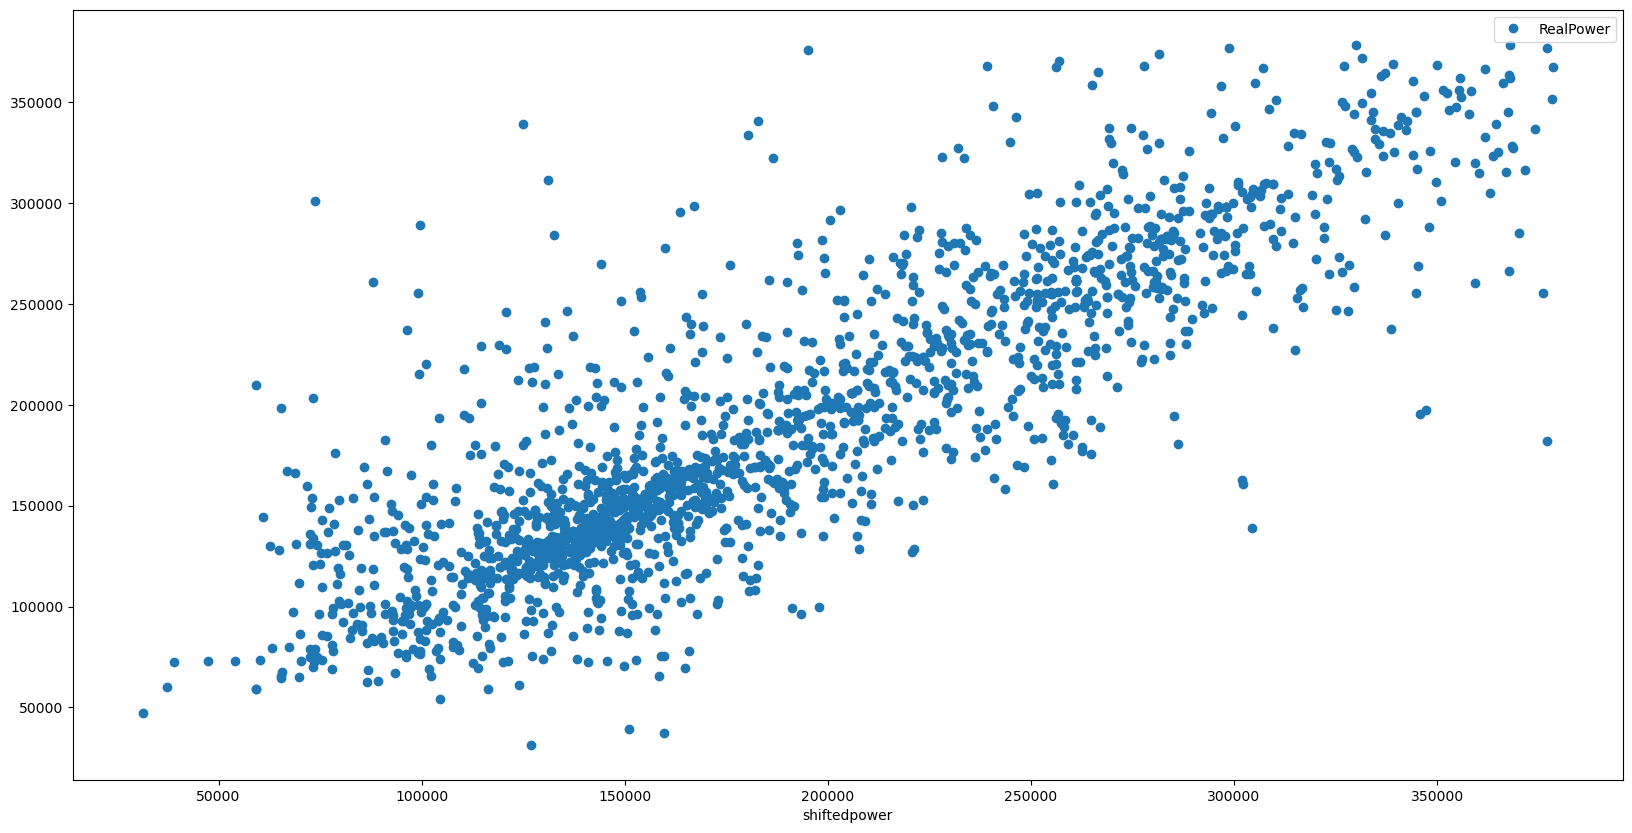

In [14]:
df.plot(x='shiftedpower',y='RealPower',figsize=(20,10),marker='o', linestyle='None')

In [15]:
df['RealPower_sqrt'] = (df['RealPower']**(1/2)).round(2)
df.head()

,RealPower,shiftedpower,RealPower_sqrt
Time,,,
2024-03-01 00:00:00,149819.75,NaN,387.07
2024-03-01 01:00:00,135160.69,149819.75,367.64
2024-03-01 02:00:00,136229.47,135160.69,369.09
2024-03-01 03:00:00,135731.84,136229.47,368.42
2024-03-01 04:00:00,137493.49,135731.84,370.80


In [16]:
df["shiftedpower_sqrt"]=df["RealPower_sqrt"].shift()
df.head()

,RealPower,shiftedpower,RealPower_sqrt,shiftedpower_sqrt
Time,,,,
2024-03-01 00:00:00,149819.75,NaN,387.07,NaN
2024-03-01 01:00:00,135160.69,149819.75,367.64,387.07
2024-03-01 02:00:00,136229.47,135160.69,369.09,367.64
2024-03-01 03:00:00,135731.84,136229.47,368.42,369.09
2024-03-01 04:00:00,137493.49,135731.84,370.80,368.42


<Axes: xlabel='shiftedpower_sqrt'>

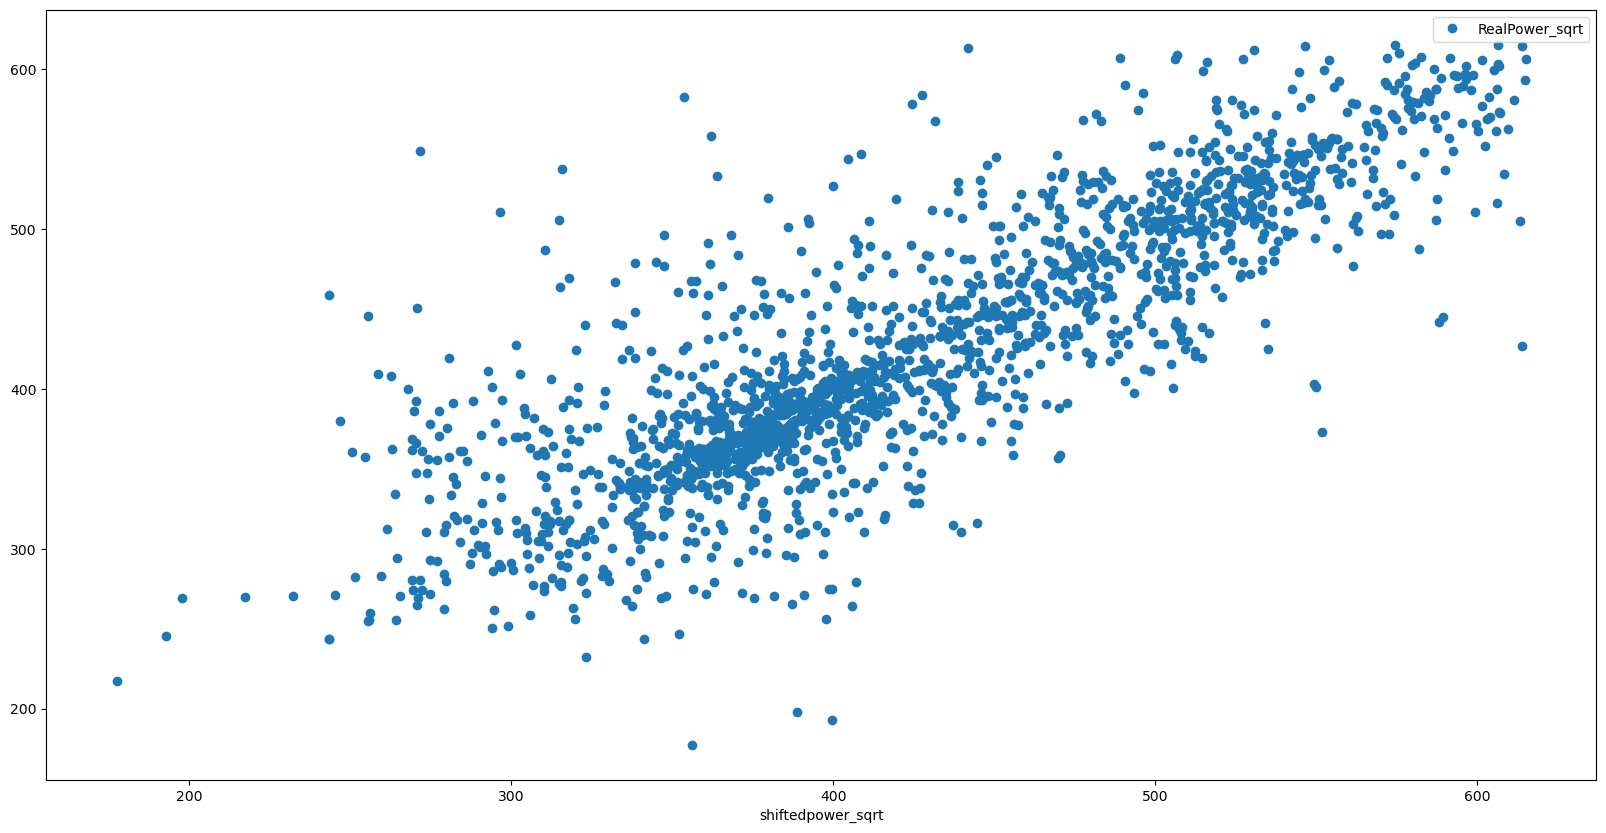

In [17]:
df.plot(x='shiftedpower_sqrt',y='RealPower_sqrt',figsize=(20,10),marker='o', linestyle='None')

In [18]:
df["PrevPower_sqrt"]=df["RealPower_sqrt"].shift()
df=df[["PrevPower_sqrt","RealPower_sqrt"]]
df.head()

,PrevPower_sqrt,RealPower_sqrt
Time,,
2024-03-01 00:00:00,NaN,387.07
2024-03-01 01:00:00,387.07,367.64
2024-03-01 02:00:00,367.64,369.09
2024-03-01 03:00:00,369.09,368.42
2024-03-01 04:00:00,368.42,370.80


In [19]:
df=df.dropna()
df.head()

,PrevPower_sqrt,RealPower_sqrt
Time,,
2024-03-01 01:00:00,387.07,367.64
2024-03-01 02:00:00,367.64,369.09
2024-03-01 03:00:00,369.09,368.42
2024-03-01 04:00:00,368.42,370.80
2024-03-01 05:00:00,370.80,387.80


<Axes: xlabel='PrevPower_sqrt'>

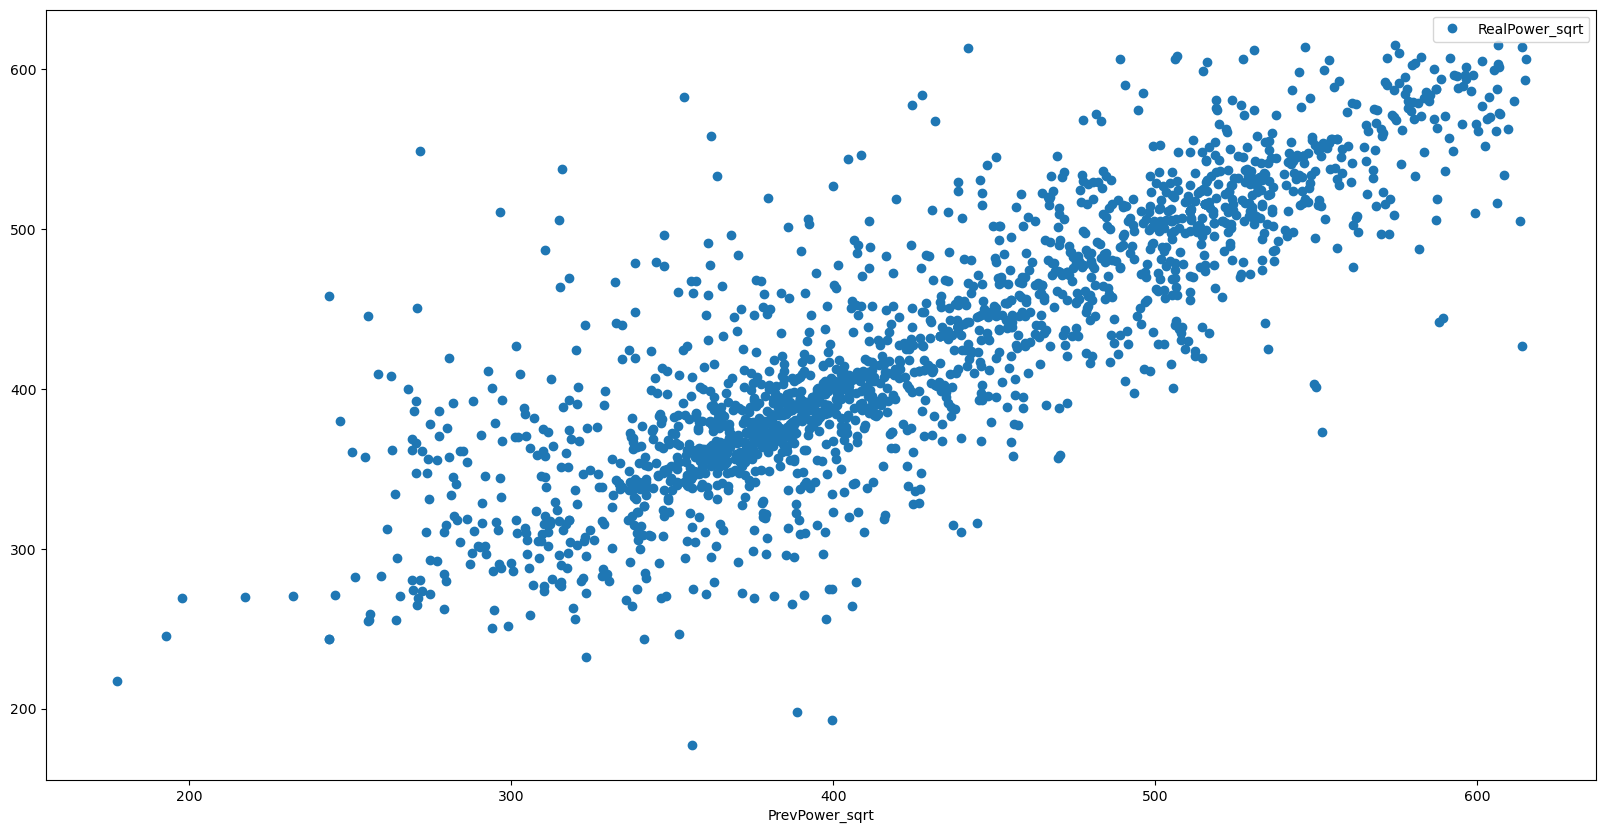

In [20]:
df.plot(x='PrevPower_sqrt',y='RealPower_sqrt',figsize=(20,10),marker='o', linestyle='None')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
n=len(df)
n

2125

In [23]:
x=df["PrevPower_sqrt"]
y=df["RealPower_sqrt"]
train_x=x[:int(0.7*n)]
train_y=y[:int(0.7*n)]
test_x=x[int(0.7*n):]
test_y=y[int(0.7*n):]

In [24]:
linear_model=LinearRegression()
linear_model.fit(train_x.values.reshape(-1,1),train_y.values)

LinearRegression()

In [25]:
w=linear_model.coef_
b=linear_model.intercept_
print(w)
print(b)

[0.84555651]
65.05362552422724


In [26]:
y_pred=linear_model.predict(test_x.values.reshape(-1,1))
y_pred

array([362.58805098, 454.55077723, 493.88606618, 528.45241639,
       556.88848189, 554.17424548, 555.67933608, 555.04516869,
       550.06484084, 548.29762773, 500.8619074 , 501.20013   ,
       487.25690312, 480.60237337, 427.0194572 , 418.75837008,
       380.21790426, 374.50194224, 362.77407342, 364.35526409,
       389.43447024, 389.18925885, 382.60237362, 382.57700693,
       328.88416841, 331.93662742, 519.51488406, 547.79874938,
       538.40461653, 531.42877531, 526.50763641, 515.35474602,
       515.35474602, 515.35474602, 493.66622148, 452.68209734,
       451.76044074, 383.92144178, 395.97062208, 388.58045816,
       384.33576447, 385.13904316, 386.50884471, 359.71315884,
       359.67088102, 400.41824933, 403.97804225, 413.96406466,
       409.60099305, 475.08934491, 489.15940527, 532.11367609,
       571.95629893, 496.4988358 , 428.55837005, 473.64344328,
       544.97459063, 518.85534998, 489.2016831 , 492.09348637,
       416.46691193, 362.39357299, 389.64585937, 453.89

In [27]:
mse=mean_squared_error(y_pred,test_y)
rmse=mse**0.5
rmse

37.57094808485049

In [28]:
import numpy as np
mean=np.mean(y)
rmse/mean

0.08906284758754056

In [29]:
linear_line=w[0]*x+b

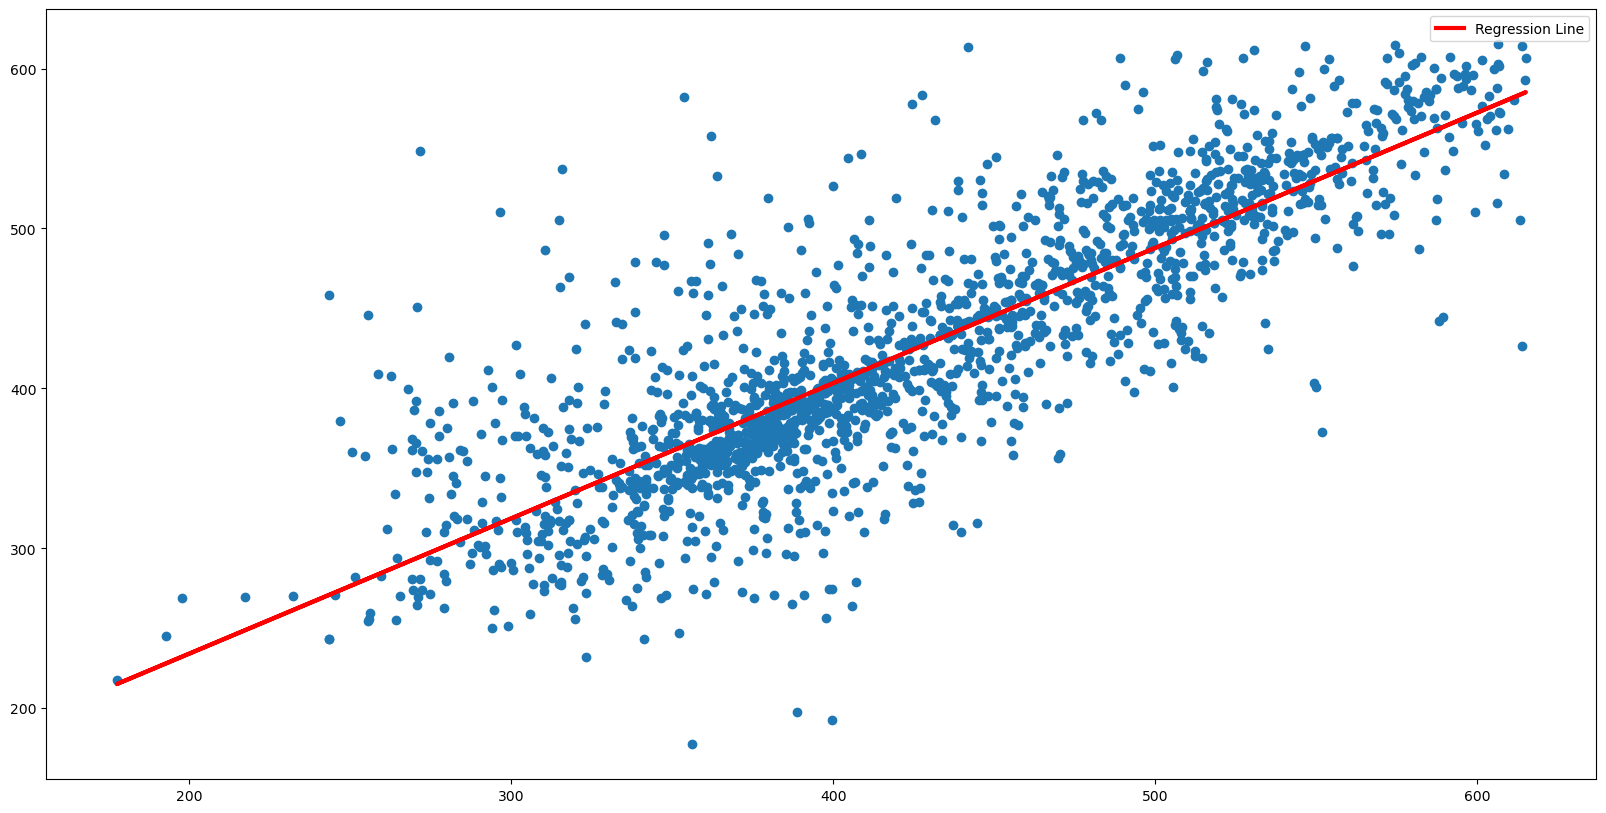

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, marker='o')
plt.plot(x,linear_line,linewidth=3,color='r',label="Regression Line")
plt.legend()
plt.show()

In [31]:
x_next=df["RealPower_sqrt"].iloc[-1]
y_next=w[0]*x_next+b
print(y_next)
round(y_next)

392.31781794788265


392

In [32]:
x_next=df["RealPower_sqrt"].loc["2024-03-30  23:00:00"]
print("The RealPower for 2024-03-30 23:00:00",x_next**2)
y_next=linear_model.predict(x_next.reshape(-1,1))
print("The RealPower for 2024-03-31 00:00:00",y_next[0]**2)
round(y_next[0]**2)

The RealPower for 2024-03-30 23:00:00 157156.74490000002
The RealPower for 2024-03-31 00:00:00 160206.141231283


160206

In [34]:
day=df.loc['2024-03-31 00:00:00':'2024-03-31 23:59:00']
x_day=day["PrevPower_sqrt"]
y_day_actual=day["RealPower_sqrt"].values

In [35]:
y_day_pred=[]
for x in x_day.values:
    y_day_pred.append(w[0]*x+b)
y_day_pred

[400.25759359602785,
 364.9386980877184,
 356.6184220091509,
 364.04240818494594,
 353.88727447523087,
 367.3739008424211,
 390.27157118872276,
 408.28192489537804,
 408.06208020224517,
 446.08675654911315,
 470.4472396612605,
 473.9055657955431,
 509.63032842963634,
 526.3131584123739,
 507.86311531945285,
 511.0508633698796,
 492.2118642814157,
 505.63930169276244,
 491.81445272075246,
 470.75164000559835,
 452.74974186406354,
 459.2013380510015,
 394.93058757011573,
 402.2361958342238]

In [38]:
for i in range(0,len(y_day_pred)):
    print("The predicted value is: ",round(y_day_pred[i]**2,2) ,"The Actual value is: ",round(y_day_actual[i]**2,2))

The predicted value is:  160206.14 The Actual value is:  125783.72
The predicted value is:  133180.25 The Actual value is:  118900.83
The predicted value is:  127176.7 The Actual value is:  125032.96
The predicted value is:  132526.87 The Actual value is:  116683.73
The predicted value is:  125236.2 The Actual value is:  127834.85
The predicted value is:  134963.58 The Actual value is:  147932.54
The predicted value is:  152311.9 The Actual value is:  164771.05
The predicted value is:  166694.13 The Actual value is:  164560.04
The predicted value is:  166514.66 The Actual value is:  203067.4
The predicted value is:  198993.39 The Actual value is:  229862.71
The predicted value is:  221320.61 The Actual value is:  233801.26
The predicted value is:  224586.49 The Actual value is:  276444.61
The predicted value is:  259723.07 The Actual value is:  297581.16
The predicted value is:  277005.54 The Actual value is:  274251.22
The predicted value is:  257924.94 The Actual value is:  278214.05

In [41]:
y_day_pred_org=[x**2 for x in y_day_pred]
y_day_actual_org=[x**2 for x in y_day_actual]

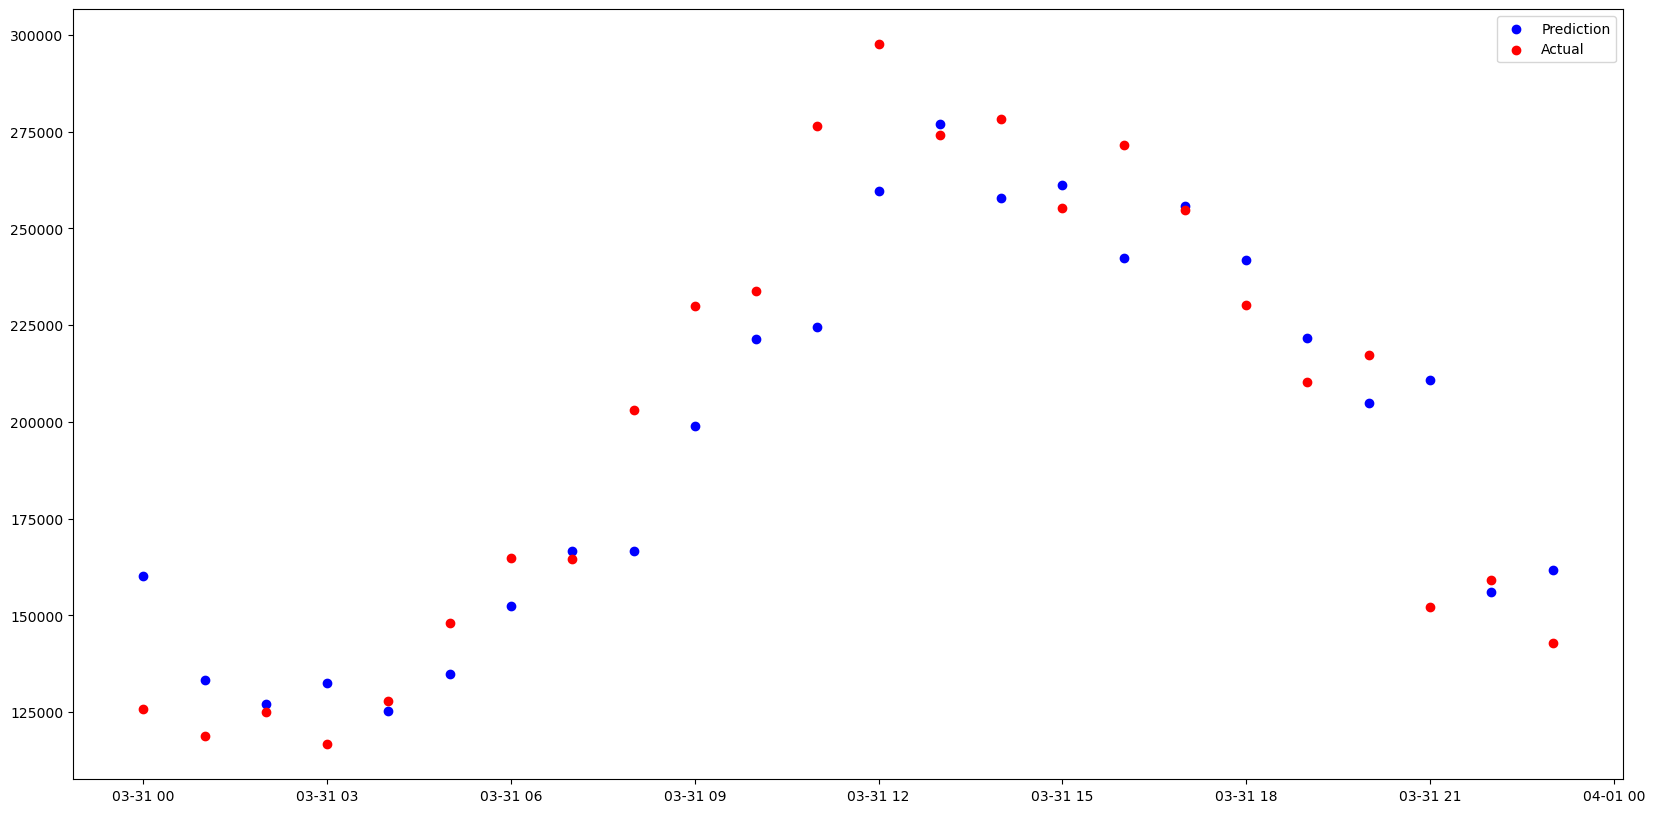

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(day.index,y_day_pred_org,label='Prediction',color='blue')
plt.scatter(day.index,y_day_actual_org,label='Actual',color='red')
plt.legend()
plt.show()